# Метод k ближайших соседей (k-NN, k Nearest Neighbors) 

План:
1. Классификация
2. Выбросы
3. Расстояние между объектами
4. KNeighborsClassifier
5. Выбор гиперпараметров
6. kNN с весами
7. Регрессия
8. Метрики для регрессии

## 1. Классификация
- Дано: обучающая выборка $X=(x_i, y_i)_{i=1}^l$
- $x_i$ - объект
- $y_i$ - ответ(целевая переменная) на объекте $x_i$
- $l$ - размер обучающей выборки
- Задача классификации: ответы из множества $Y=\{1, ..., K\}$

- knn - самый простой алгоритм ML
- построение модели заключается в запоминании обучающего набора данных X
- прогноз для новой точки данных делается по ближайшим к ней "соседям" из обучающего набора


In [564]:
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor, RadiusNeighborsClassifier
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
import numpy as np

### Пример 1

Дано: два класса (синие и красные объекты). 

К какому классу отнести новый объект?

Гипотеза компактности: если два объекта похожи друг на друга, то ответы на них тоже похожи (если точка находится близко к скоплению точек одного класса, то она тоже должна ему принадлежать)

In [565]:
x, y = make_blobs(n_samples=20, n_features=2, centers=2,
                  cluster_std=1, random_state=17)

In [566]:
print(f'features: {x[0,0]:.2f} {x[0,1]:.2f}   class: {y[0]}') # blue
print(f'features: {x[1,0]:.2f} {x[1,1]:.2f}   class: {y[1]}') # red

features: -3.57 -1.16   class: 0
features: -5.20 -7.77   class: 1


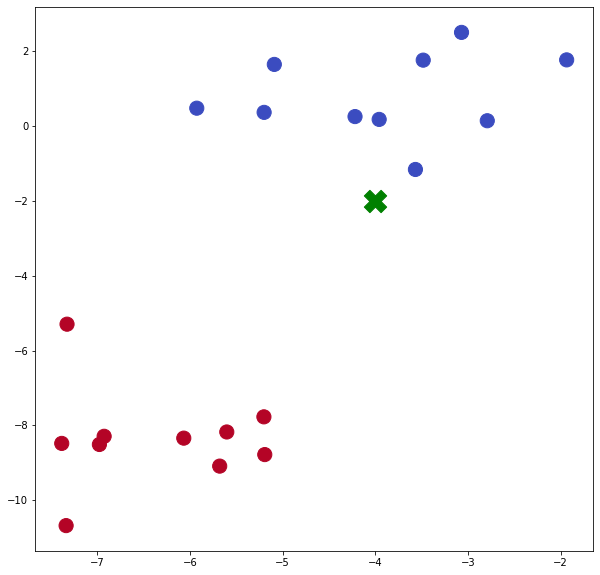

In [567]:
cmap = plt.cm.coolwarm

plt.figure(figsize=(10,10))
plt.scatter(x[:,0], x[:,1], s = 200, c = y, cmap=cmap)
plt.scatter(-4, -2, s = 500, c='g', marker='X');

Какой объект из обучающей выборки находится наиболее близко к новому? Присваиваем его метку класса новому объекту.

### Пример 2

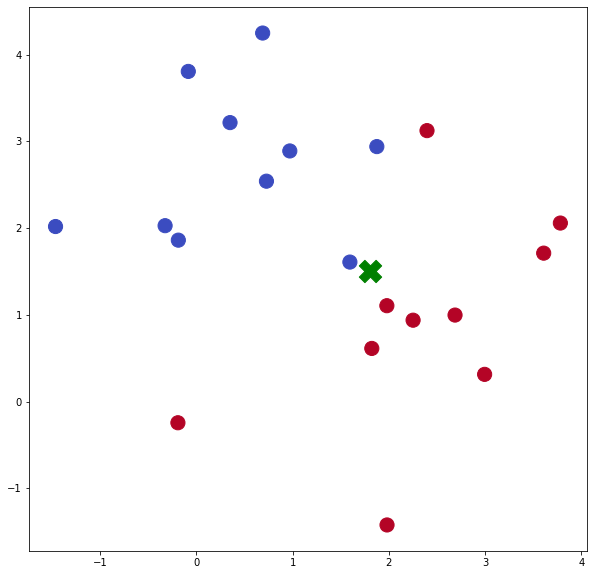

In [568]:
x, y = make_blobs(n_samples=20, n_features=2, centers=2,
                  cluster_std=1, random_state=9, center_box=(0,5))

plt.figure(figsize=(10,10))
plt.scatter(x[:,0], x[:,1], s= 200, c = y, cmap=cmap)
plt.scatter(1.8, 1.5, s=500, c='g', marker='X');

Построим классификатор. 

Так как алгоритм ищет ближайшее расстояние до некоторого объекта из обучающей выборки, все пространство будет разбито на области. Эти области будут контролироваться объектами обучающей выборки, находящимися внутри них. 

Плоскость разделяющая классы объектов будет представлять собой ломанную прямую.

In [569]:
clf = KNeighborsClassifier(n_neighbors=1)
clf.fit(x,y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

In [571]:
Z

array([[0, 0, 0, ..., 1, 1, 1],
       [0, 0, 0, ..., 1, 1, 1],
       [0, 0, 0, ..., 1, 1, 1],
       ...,
       [0, 0, 0, ..., 1, 1, 1],
       [0, 0, 0, ..., 1, 1, 1],
       [0, 0, 0, ..., 0, 1, 1]])

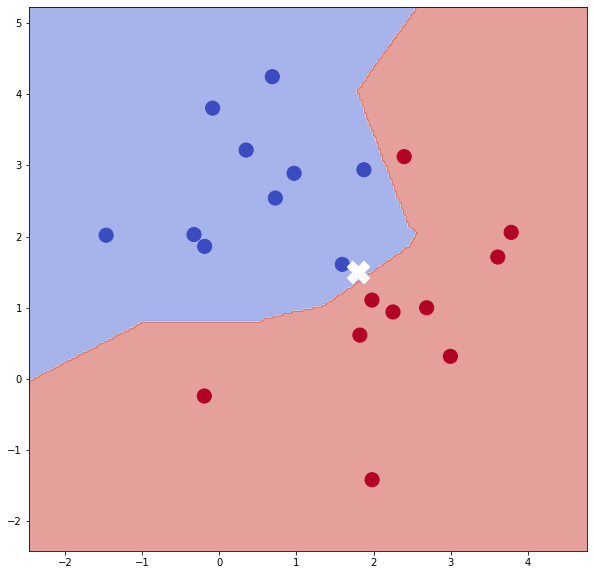

In [572]:
h = .03
x_min, x_max = np.min(x[:,0]) - 1, np.max(x[:,0]) + 1
y_min, y_max = np.min(x[:,1]) - 1, np.max(x[:,1]) + 1

xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

Z = clf.predict(np.vstack((xx.ravel(), yy.ravel())).transpose())
Z = Z.reshape(xx.shape)

plt.figure(figsize=(10,10))
plt.contourf(xx, yy, Z, cmap=cmap, alpha=.5)
plt.scatter(x[:,0], x[:,1], s=200, c = y, cmap=cmap)
plt.scatter(1.8, 1.5, s=500, c='white', marker='X');

### Выбросы (outliers)
- Алгоритм очень чувствителен к ошибкам в данных. 
- Каждая ошибка в даннных значительно изменяет границу, что очень плохо сказывается на предсказательной способности алгоритма.
- Алгоритм сильно переобучен

Как уменьшить "переобучение":
- использовать более одного ближайшего соседа. Принимать решение, например, по трем ближайшим соседям. 
- с увеличением числа соседей алгоритм будет становиться более стабильным и иметь более гладкие границы.

In [573]:
x0, x1 = 1.8, 1.5

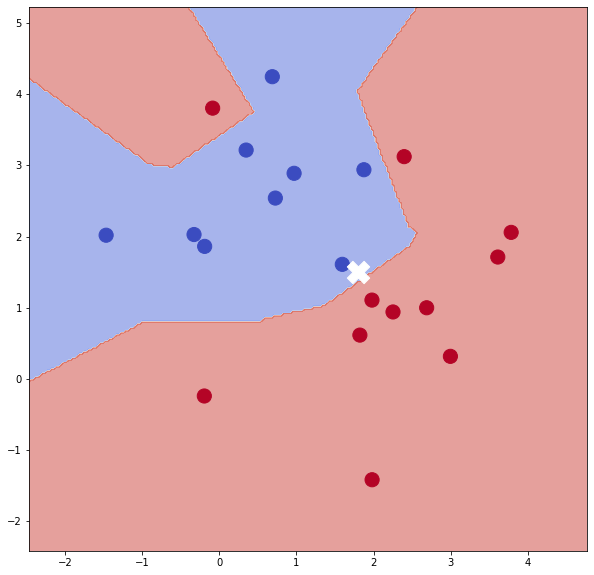

In [574]:
y[-8] = 1
clf.fit(x,y)

Z = clf.predict(np.vstack((xx.ravel(), yy.ravel())).transpose())
Z = Z.reshape(xx.shape)

plt.figure(figsize=(10,10))
plt.contourf(xx, yy, Z,  cmap=cmap, alpha=.5)
plt.scatter(x[:,0], x[:,1], s=200, c = y, cmap=cmap)
plt.scatter(x0, x1, s=500, c='white', marker='X');

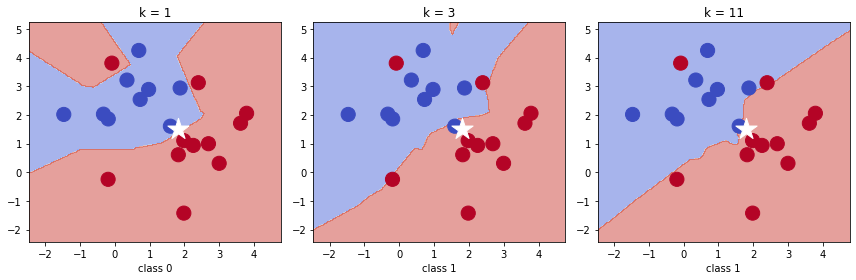

In [575]:
plt.figure(figsize=(12, 4))

plt.subplot(131)
clf = KNeighborsClassifier(n_neighbors=1)
clf.fit(x,y)
Z = clf.predict(np.vstack((xx.ravel(), yy.ravel())).transpose())
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z,  cmap=cmap, alpha=.5)
plt.scatter(x[:,0], x[:,1], s=200, c = y, cmap=cmap)
plt.scatter(x0, x1, s=500, c='white', marker='*')
c = clf.predict([[x0, x1]])
plt.title('k = 1')
plt.xlabel(f'class {c[0]}')

plt.subplot(132)
clf = KNeighborsClassifier(n_neighbors=3)
clf.fit(x,y)
Z = clf.predict(np.vstack((xx.ravel(), yy.ravel())).transpose())
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z,  cmap=cmap, alpha=.5)
plt.scatter(x[:,0], x[:,1], s=200, c = y, cmap=cmap)
plt.scatter(x0, x1, s=500, c='white', marker='*')
c = clf.predict([[x0, x1]])
plt.title('k = 3')
plt.xlabel(f'class {c[0]}')

plt.subplot(133)
clf = KNeighborsClassifier(n_neighbors=11)
clf.fit(x,y)
Z = clf.predict(np.vstack((xx.ravel(), yy.ravel())).transpose())
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z,  cmap=cmap, alpha=.5)
plt.scatter(x[:,0], x[:,1], s=200, c = y, cmap=cmap)
plt.scatter(x0, x1, s=500, c='white', marker='*')
c = clf.predict([[x0, x1]])
plt.title('k = 11')
plt.xlabel(f'class {c[0]}')
plt.tight_layout();



### Пример 3

In [576]:
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
digits = load_digits()

In [577]:
x = digits['data']
y = digits['target']
img = digits['images']

In [578]:
type(x)

numpy.ndarray

#### Представление данных:

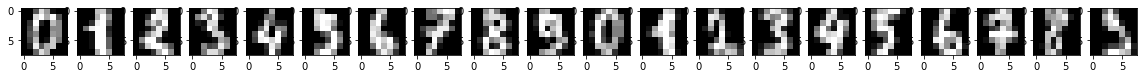

In [579]:
plt.figure(figsize=(20,10))
for it in range(20):
    plt.subplot(1, 20, it+1)
    plt.imshow(img[it], cmap=plt.cm.gray)
    

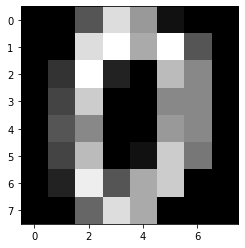

In [580]:
plt.imshow(img[0], cmap=plt.cm.gray);

In [581]:
img[0]

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

In [582]:
img[0].min(), img[0].max()

(0.0, 15.0)

Битовая глубина 4 ($2^4 = 16$ цветов)
<img src="Gradient-Bit-Depth.jpg">

#### Распределение классов датасета:

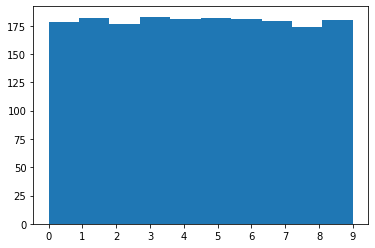

In [583]:
plt.hist(y, bins=10)
plt.xticks(range(0, 10));

#### Разбиение исходных данных на обучающую и контрольную выборки:

In [584]:
x_train, x_test, y_train, y_test, img_train, img_test = train_test_split(x, y, img, 
                                                                         test_size = 0.5, 
                                                                         random_state=17)

#### Распределение классов обучающей выборки:

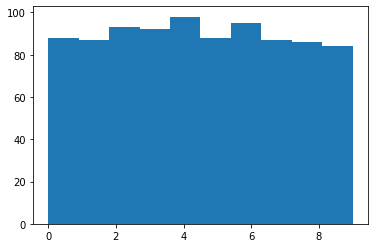

In [585]:
plt.hist(y_train);

## Как измерить расстояние (метрику) между объектами

###  Eвклидово расстояние (Euclidean distance)

Для точек ${\displaystyle p=(p_{1},\dots ,p_{n})}$ и ${\displaystyle q=(q_{1},\dots ,q_{n})} $ евклидово расстояние определяется следующим образом: $${\displaystyle d(p,q)={\sqrt {(p_{1}-q_{1})^{2}+(p_{2}-q_{2})^{2}+\dots +(p_{n}-q_{n})^{2}}}={\sqrt {\sum _{k=1}^{n}(p_{k}-q_{k})^{2}}}}$$

In [586]:
import numpy as np

#### Расстояние Евклида для изображений из одного класса:

In [587]:
np.sqrt(np.sum((img[6] - img[6 + 10]) ** 2))

33.80828300875393

#### Расстояние Евклида для изображений из разных классов:

In [588]:
np.sqrt(np.sum((img[6] - img[9]) ** 2))

52.316345438113316

In [589]:
distances = np.zeros((10,10))
for i in range(10):
    for j in range(10):
        distances[i, j] = np.sqrt(np.sum((img[i] - img[j]) ** 2))

In [590]:
import seaborn as sns

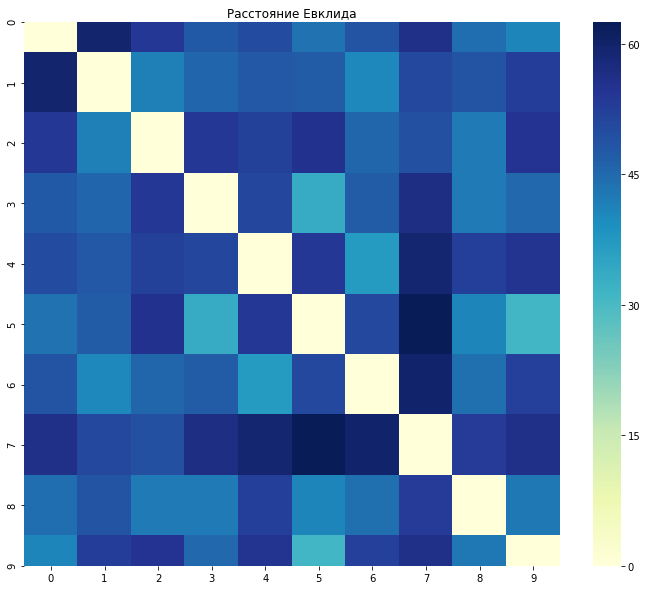

In [591]:
plt.figure(figsize=(12,10))
sns.heatmap(distances, cmap="YlGnBu").set_title('Расстояние Евклида');

- Расстояние Евклида "сам с собой" равно 0 (расстояния идентичны)
- Чем меньше расстояние, тем более похожи изображения, тем они ближе в пространстве
- Самые непохожие между собой (далёкие) цифры - 5 и 7
- Самые похожие (разные) цифры - 5 и 9

In [592]:
np.unravel_index(np.argmax(distances, axis=None), distances.shape)

(5, 7)

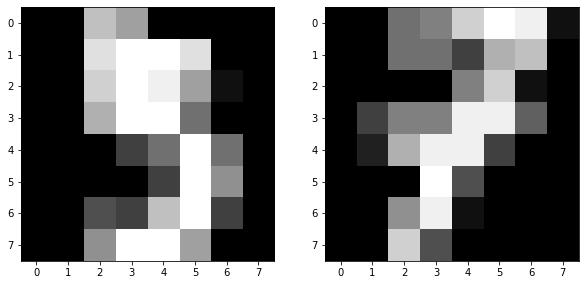

In [593]:
plt.figure(figsize=(10,10))
plt.subplot(1,2,1)
plt.imshow(img[5], cmap=plt.cm.gray)
plt.subplot(1,2,2)
plt.imshow(img[7], cmap=plt.cm.gray);

In [594]:
distances[distances == 0] = 100
np.unravel_index(np.argmin(distances, axis=None), distances.shape)

(5, 9)

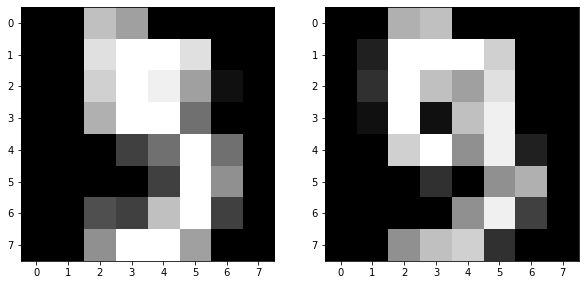

In [595]:
num = 6
plt.figure(figsize=(10,10))
plt.subplot(1,2,1)
plt.imshow(img[5], cmap=plt.cm.gray)
plt.subplot(1,2,2)
plt.imshow(img[9], cmap=plt.cm.gray);

### Другие расстояния
#### Для числовых данных
- Два важнейших параметра для алгоритма knn - это количество соседей и мера расстояния между точками данных
- В KNeighborsClassifier есть параметр p(power), с помощью которого можно поменять степень в метрике Минковского (Minkowski metric)
- **Расстояние Минковского** порядка ${\displaystyle p}$ между двумя точками определяется как:

$${\displaystyle \rho (x,y)=\left(\sum _{i=1}^{n}|x_{i}-y_{i}|^{p}\right)^{1/p}} $$

- Если ${\displaystyle p=1}$, то получается **манхэттенское расстояние** (метрика **L1**, метрика такси,  taxicab metric, L1 distance, snake distance, city block distance, Manhattan distance)

$${\displaystyle \rho (x,y)= \sum _{i=1}^{n}|x_{i}-y_{i}|}$$

<img src="Manhattan_distance.png">

- Красный, желтый и синий пути имеют одинаковое кратчайшее манхэттенское расстояние = 12
- Зелёный путь - уникальный, кратчайшее евклидово расстояние ${\displaystyle 6{\sqrt {2}}\approx 8.49}$ 
- измеряем не по прямой, как в евклидовом расстоянии, а параллельно осям координат
- манхэттенское расстояние чаще используется для многомерных данных (curse of dimensionality, проклятие размерности) This phenomenon states that with a fixed number of training samples, the average (expected) predictive power of a classifier or regressor first increases as the number of dimensions or features used is increased but beyond a certain dimensionality it starts deteriorating instead of improving steadily.
- манхэттенское расстояние можно использовать на данных с выбросами

- Если ${\displaystyle p=2}$, то получается **евклидово расстояние**: 
$${\displaystyle \rho (x,y)={\sqrt {\sum _{k=1}^{n}(p_{k}-q_{k})^{2}}}}$$
- не подходит для данных с выбросами (для них выдаётся очень большое расстояние)

#### Для категориальных данных
- Если признаки категориальные, то можно использовать **расстояние Хемминга**
- не числа, не можем сравнивать. Можно только сравнить на равенство.

$$\displaystyle \rho (x,y) = {\sum _{k=1}^{n}{x_k \neq y_k}}$$

- единица там, где атрибуты не совпадают
- есть и другие признаки (текст, изображения, временные ряды). Для них существуют другие метрики

## Применение алгоритма k ближайших соседей:
- Дано: новый объект *x*, необходимо узнать его класс
- Сортируем объекты обучающей выборки по расстоянию(например, евклидово расстояние) до нового объекта
- Выбираем k ближайших объектов
- Выдаем наиболее популярный среди них класс

## KNeighborsClassifier

In [596]:
clf = KNeighborsClassifier(n_neighbors=7, weights ='distance', p=2)
clf.fit(x_train, y_train)
print(f'Mean accuracy (train): {clf.score(x_train, y_train):.2f}') # алгоритм запомнил данные
print(f'Mean accuracy (test) : {clf.score(x_test, y_test):.2f}')

Mean accuracy (train): 1.00
Mean accuracy (test) : 0.97


### Ближайшие соседи:

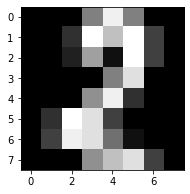

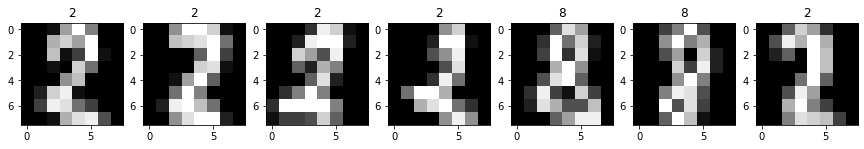

In [597]:
ind = 1
dist, nums = clf.kneighbors(x_test[ind].reshape(1, -1), n_neighbors=7)

plt.figure(figsize=(3,3))
plt.imshow(img_test[ind], cmap=plt.cm.gray)

plt.figure(figsize=(15,10))
for it, num in enumerate(nums[0]):
    plt.subplot(1, len(nums[0]), it+1)
    plt.imshow(img_train[num], cmap=plt.cm.gray)
    plt.title(y_train[nums[0, it]])

5 соседей из 7 - двойки, 2 соседа восьмёрки

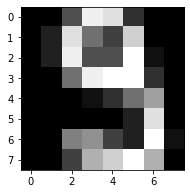

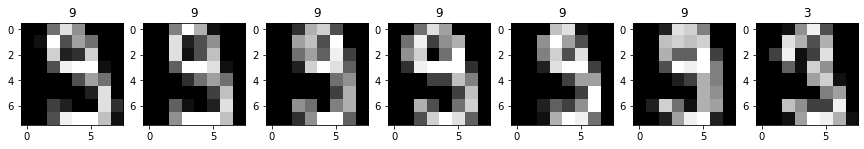

In [598]:
ind = 7
dist, nums = clf.kneighbors(x_test[ind].reshape(1, -1), n_neighbors=7)
plt.figure(figsize=(3,3))
plt.imshow(img_test[ind], cmap=plt.cm.gray)
plt.figure(figsize=(15,10))
for it, num in enumerate(nums[0]):
    plt.subplot(1, len(nums[0]), it+1)
    plt.imshow(img_train[num], cmap=plt.cm.gray)
    plt.title(y_train[nums[0, it]])
#print(y_train[nums[0]])

# Измерение ошибки модели классификации
- Как срвнивать модели? Какая лучше?
- Как выбрать параметр k и метрику?
## Функция потерь в классификации
- доля верных ответов (accuracy), не точность(precision)
| predicted | gt |
| --- | --- |
|0|0|
|1|1|
|0|0|
|**1**|0|
|1|1|
- 4 правильных ответа из 5, доля верных ответов (accuracy) = 0.8
- не подходит, если классы несбалансированны. Например, в задаче выявления редкого заболевания может быть 950 здоровых пациентов и 50 больных. Если "модель" просто называет всех пациентов здоровыми, то её точность 0.95



### Выбор гиперпараметров 
#### Количество соседей

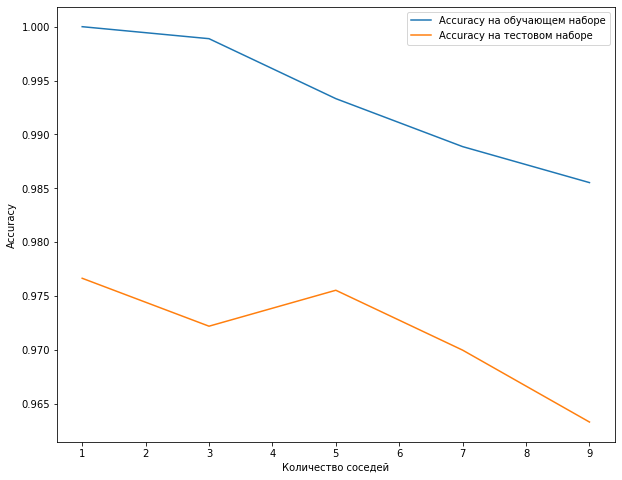

In [599]:
training_accuracy = []
test_accuracy = []

neighbors_settings = range(1, 11, 2)
for n_neighbors in neighbors_settings:
    clf = KNeighborsClassifier(n_neighbors=n_neighbors)
    clf.fit(x_train, y_train)

    training_accuracy.append(clf.score(x_train, y_train))
    test_accuracy.append(clf.score(x_test, y_test))
    

plt.figure(figsize=(10,8))
plt.plot(neighbors_settings, training_accuracy, label="Accuracy на обучающем наборе")
plt.plot(neighbors_settings, test_accuracy, label="Accuracy на тестовом наборе")
plt.ylabel("Accuracy")
plt.xlabel("Количество соседей")
plt.legend();

- Гиперпараметры нельзя выбирать по обучающей выборке
- Accuracy для 1 соседа на обучающем наборе = 1 (запоминание данных)


- Наибольшая Accuracy (для данного набора данных) достигается при 1 или 5 соседях


- Нужно "скрыть" от модели часть данных, не использовать их в обучении
- **Обучающая выборка** (train) используется для построения модели
- **Валидационная выборка** используется для подбора гиперпараметров модели
- **Тестовая выборка** - финальная оценка качества модели


- Если модель показывает хорошее качество на обучающей выборке, но плохое на тестовой, то она переобучилась (overfitting)
- Обычно соотношение train/test 70/30 или 80/20

- Можно использовать кросс-валидацию (надежнее, медленно)
- Обычно n=3, n=5, n=10. +leave-one-out 

## Недостатки knn и модификации алгоритма
- не учитывается близость объектов
- синих точек много, но они далеко, оранжевых точек мало, но они очень близко
- если k=3, то будет оранжевый класс
- если k=7, то будет синий класс

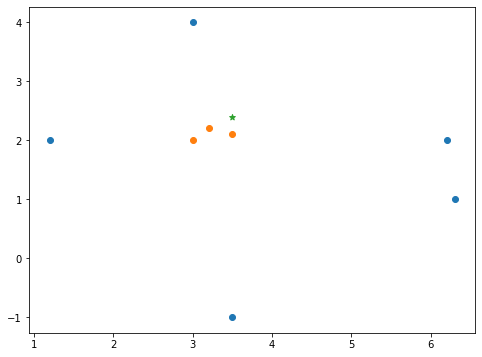

In [600]:
plt.figure(figsize=(8,6))
plt.scatter([3.5, 1.2, 3, 6.2, 6.3], [-1, 2, 4, 2, 1])
plt.scatter([3, 3.5, 3.2], [2, 2.1, 2.2])
plt.scatter(3.5,2.4, marker='*');

### Взвешенный knn
- те объекты, которые ближе, учитываются с большим весом
- далёкие объекты вносят меньший вклад (но учитываются)
#### Парзеновское окно
$$\displaystyle w_i = K(\frac{\rho (x,x_{(i)})}{h})$$
$K$ - ядро
$h$ - ширина окна, с какого расстояния практически перестаём учитывать объекты
- Можно использовать гауссовское ядро (шляпа)
- В sklearn.neighborsClassifier есть параметр weights. Если uniform, то веса равны 1, если distance, то обратно пропорциональны расстоянию 

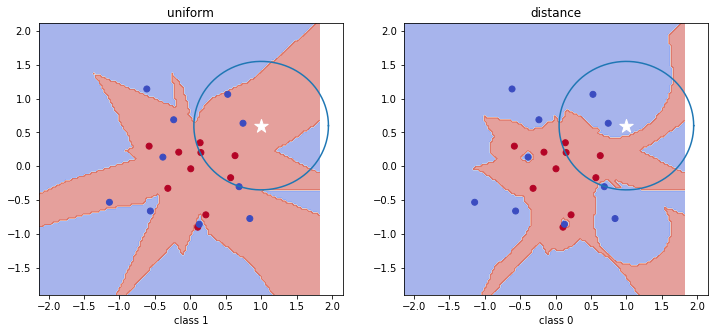

In [614]:
x0, x1 = 1, 0.6
x, y = sklearn.datasets.make_circles(noise=0.3, factor=0.4, random_state=1, n_samples=20)
h = .03
x_min, x_max = np.min(x[:,0]) - 1, np.max(x[:,0]) + 1
y_min, y_max = np.min(x[:,1]) - 1, np.max(x[:,1]) + 1

xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

theta = np.linspace(0, 2 * np.pi, 100)

radius = 0.95

a = radius * np.cos(theta) + 1
b = radius * np.sin(theta) + 0.6



plt.figure(figsize=(12, 5))

plt.subplot(121)
clf = KNeighborsClassifier(n_neighbors=7, weights='uniform')
clf.fit(x,y)
Z = clf.predict(np.vstack((xx.ravel(), yy.ravel())).transpose())
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z,  cmap=cmap, alpha=.5)
plt.scatter(x[:,0], x[:,1], c = y, cmap=cmap)
plt.scatter(x0, x1, c='white', marker='*', s=200)
plt.plot(a,b)
c = clf.predict([[x0, x1]])
plt.title('uniform')
plt.xlabel(f'class {c[0]}')

plt.subplot(122)
clf = KNeighborsClassifier(n_neighbors=7, weights='distance')
clf.fit(x,y)
Z = clf.predict(np.vstack((xx.ravel(), yy.ravel())).transpose())
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z,  cmap=cmap, alpha=.5)
plt.scatter(x[:,0], x[:,1], c = y, cmap=cmap)
plt.scatter(x0, x1, c='white', marker='*', s=200)
#plt.ylim((-2,2))

plt.plot(a,b)

c = clf.predict([[x0, x1]])
plt.title('distance')
plt.xlabel(f'class {c[0]}');




- В первом случае, когда веса не учитываются, в область попало 4 красных соседа и 3 синих, поэтому получился красный класс
- Во втором случае, когда веса учитываются, получается синий класс, так как ближе всего находится синий объект, а все остальные - далеко

## 2. Регрессия

- Рассчитывается расстояние между объектами
- Выбирается k ближайших объектов
- Ответ - среднее значение

$\hat{y} = f(x) = \frac{1}{k}\sum \limits_{j=1}^{k} y_j$

In [602]:
import pandas as pd

In [603]:
df = pd.read_csv('Life_Expectancy_Data.csv')
df = df.loc[df['Country'] == 'Russian Federation']
df = df[['Year', 'Life expectancy ']]
train = df.iloc[::2, :]
test = df.iloc[1::2, :]

In [604]:
train

,Year,Life expectancy
2135,2015,75.0
2137,2013,70.0
2139,2011,69.4
2141,2009,68.2
2143,2007,67.3
2145,2005,65.0
2147,2003,64.6
2149,2001,65.1


In [605]:
test

,Year,Life expectancy
2136,2014,73.0
2138,2012,69.6
2140,2010,68.4
2142,2008,67.5
2144,2006,66.4
2146,2004,64.9
2148,2002,64.8
2150,2000,65.0


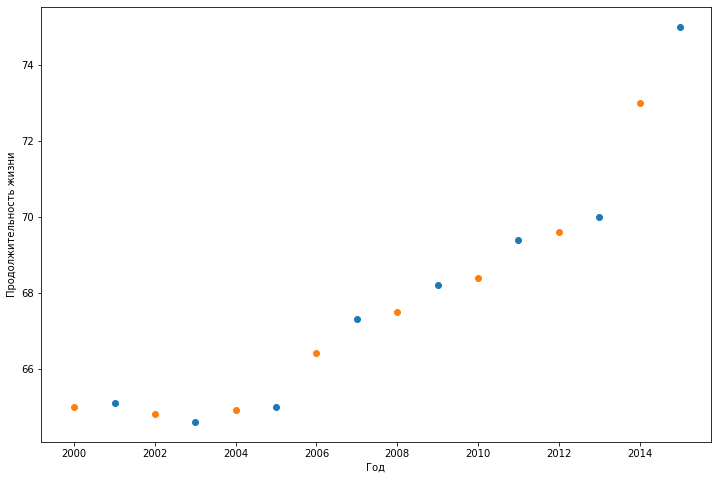

In [606]:
plt.figure(figsize=(12,8))
plt.scatter(train['Year'], train['Life expectancy '], label = 'train')
plt.scatter(test['Year'], test['Life expectancy '], label = 'test')
plt.xlabel('Год')
plt.ylabel('Продолжительность жизни');

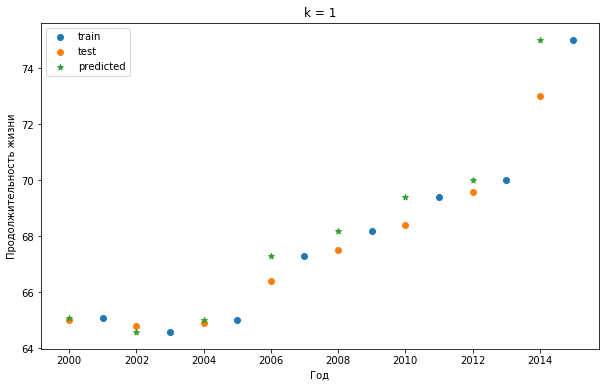

In [607]:
clf = KNeighborsRegressor(n_neighbors=1, weights='distance')
clf.fit(train['Year'].values.reshape(-1, 1), train['Life expectancy '].values.reshape(-1, 1))

pred = clf.predict(test['Year'].values.reshape(-1, 1))

plt.figure(figsize=(10,6))
plt.title('k = 1')
plt.scatter(train['Year'], train['Life expectancy '], label='train')
plt.scatter(test['Year'], test['Life expectancy '], label='test')
plt.scatter(test['Year'], pred, label='predicted', marker='*')
plt.xlabel('Год')
plt.ylabel('Продолжительность жизни')
plt.legend();

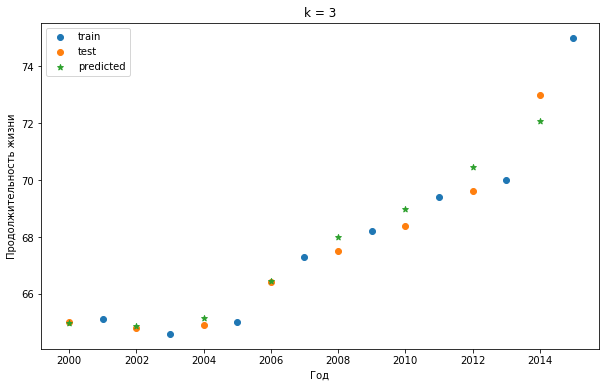

In [608]:
clf = KNeighborsRegressor(n_neighbors=3, weights='distance')
clf.fit(train['Year'].values.reshape(-1, 1), train['Life expectancy '].values.reshape(-1, 1))
pred = clf.predict(test['Year'].values.reshape(-1, 1))
plt.figure(figsize=(10,6))
plt.title('k = 3')
plt.scatter(train['Year'], train['Life expectancy '], label='train')
plt.scatter(test['Year'], test['Life expectancy '], label='test')
plt.scatter(test['Year'], pred, label='predicted', marker='*')
plt.xlabel('Год')
plt.ylabel('Продолжительность жизни')
plt.legend();

In [609]:
np.random.seed(42)
x_real = np.linspace(start=-5, stop=10, num=100)
y_real = 100 * np.sin(x_real) + 5* x_real ** 2 + 2 * x_real

x_train = np.linspace(start=-5, stop=10, num=7)
y_train = 100 * np.sin(x_train) + 5*x_train ** 2 + 2 * x_train + 0.5 * np.random.normal(size=x_train.size)

x_test = np.linspace(start=-4.5, stop=9, num=7)
y_test = 100 * np.sin(x_test) +   5*x_test ** 2 + 2 * x_test + 0.5 * np.random.normal(size=x_test.size)

In [610]:
np.random.seed(42)

def gaussian(x, a, b, c):
    return a*np.exp(-np.power(x - b, 2)/(2*np.power(c, 2)))# Generate dummy dataset

x_real = np.linspace(start=-20, stop=20, num=100)
y_real = gaussian(x_real, 8, -1, 3)

x_train = np.linspace(start=-20, stop=20, num=7)
y_train = gaussian(x_train, 8, -1, 3)
noise = 0.5 * np.random.normal(size=y_train.size)
y_train = y_train + noise


x_test = np.linspace(start=-19, stop=19, num=10)
y_test = gaussian(x_test, 8, -1, 3)
noise = 0.5 * np.random.normal(size=y_test.size)
y_test = y_test + noise


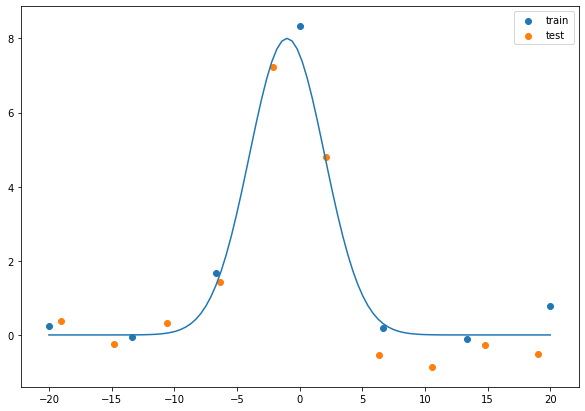

In [611]:
plt.figure(figsize=(10,7))

plt.plot(x_real, y_real)


plt.scatter(x_train, y_train, label='train')
plt.scatter(x_test, y_test, label='test')
plt.legend();


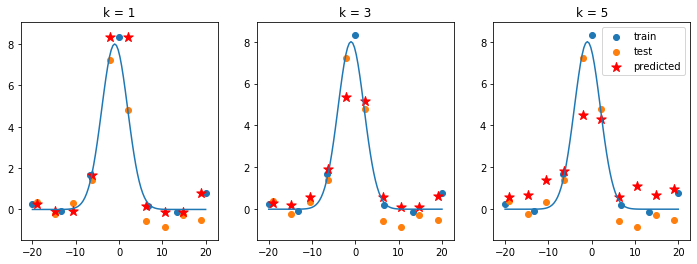

In [612]:
plt.figure(figsize=(12, 4))

plt.subplot(131)
plt.plot(x_real, y_real)

plt.scatter(x_train, y_train, label='train')
plt.scatter(x_test, y_test, label='test')

clf = KNeighborsRegressor(n_neighbors=1, weights='distance')
clf.fit(x_train.reshape(-1, 1), y_train.reshape(-1, 1))

plt.scatter(x_test, clf.predict(x_test.reshape(-1, 1)), s = 100, marker='*', c='r')
plt.title('k = 1')

plt.subplot(132)
plt.plot(x_real, y_real)

plt.scatter(x_train, y_train, label='train')
plt.scatter(x_test, y_test, label='test')
clf.n_neighbors = 3
plt.scatter(x_test, clf.predict(x_test.reshape(-1, 1)), s = 100, marker='*', c='r')
plt.title('k = 3')

plt.subplot(133)
plt.plot(x_real, y_real)

plt.scatter(x_train, y_train, label='train')
plt.scatter(x_test, y_test, label='test')
clf.n_neighbors = 5
plt.scatter(x_test, clf.predict(x_test.reshape(-1, 1)), s = 100, marker='*', c='r', label='predicted')
plt.title('k = 5')
plt.legend();

- Если k = 1, то просто копируется ближайшее значение
- Если k = 5, то берется слишком много точек и график "усредняется", теряется амплитуда
- Необходимо использовать метрики, чтобы подобрать правильное значение параметра k

## Метрики для регрессии

## Выбор числа соседей
Большее число соседей означает более вероятный класс для тестового значения

Меньшее число соседей означает неустойчивость в классифкации.

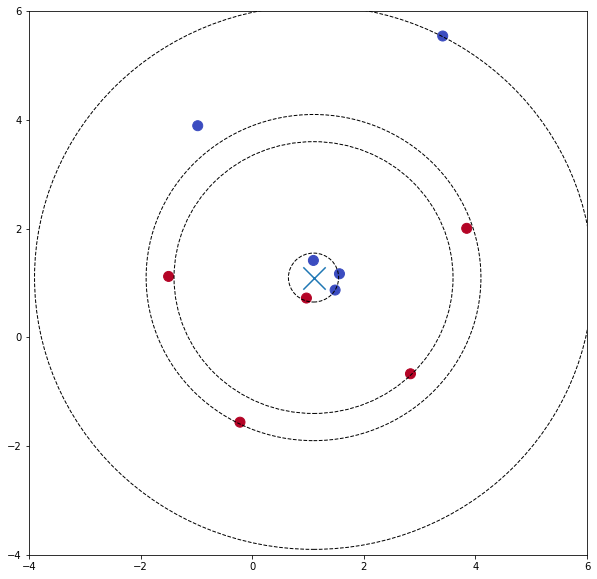

In [613]:
x, y = make_blobs(n_samples=10, n_features=2, center_box=(0,3), centers=2 ,cluster_std=2, random_state=3)
cmap = plt.cm.coolwarm
plt.figure(figsize=(10,10))
ax = plt.gca()
# plt.figure(figsize=(10,10))
ax.set_xlim((-4, 6))
ax.set_ylim((-4, 6))
ax.scatter(x[:,0], x[:,1], s= 100, c = y, cmap=cmap)
ax.scatter(1.1, 1.1, s=500, marker='x')
ax.add_artist(plt.Circle((1.1, 1.1), radius=0.45, fill=False, ls='--'))
ax.add_artist(plt.Circle((1.1, 1.1), radius=2.5, fill=False, ls='--'))
ax.add_artist(plt.Circle((1.1, 1.1), radius=3, fill=False, ls='--'))
ax.add_artist(plt.Circle((1.1, 1.1), radius=5, fill=False, ls='--'))

## Расстояние между объектами
Ключевой компонент алгоритма, так как итоговые алгоритмы будет существенно отличаться при использовании различных метрик расстояний.

### Эвклидово расстояние (численные атрибуты)
Наиболее распрастраненной метрикой является Эвклидово расстояние. Функция симметричкая, сферическа, все признаки равные по своему вкладу.

Есть проблема - чувствительность к выбросам в отдельных атрибутах объекта.

$D(x,x') = \sqrt{\sum_d|x_d - x'_d|^2}$

### Расстояние Хемминга (категориальные атрибуты)

$D(x,x') = \sum_d 1_{x_d \neq x'_d}$

там где атрибуты не совпадают.

### Расстояние Минковского (p-norm)

$D(x,x') = \sqrt[p]{\sum_d|x_d - x'_d|^p}$

### Расстояние Кулюбака-Лейблера

$D(x,x') = -\sum_d x_d \log \frac{x_d}{x'_d}$

## Практические проблемы
- равное количество соседей с одинаковыми метками не позволяет точно провести классификацию.
- приходится использовать нечетное количество, но это может не сработать в мультиклассовой классификации.
- решение проблем:
    - взять класс для тестового случая наугад;
    - воспользоваться 1-nn;
    - давать класс по приоритету.

Отсутствующие атрибуты в данных необходимо заполнять, с пропущенными данными невозможно посчитать расстояние. 
Причем большое значение в одном атрибуте может серьезно повлиять на классификацию.
Лучше всего использовать среднее значение.

## Метод Парзеновского окна

Text(0.5, 1.0, 'Parzen window')

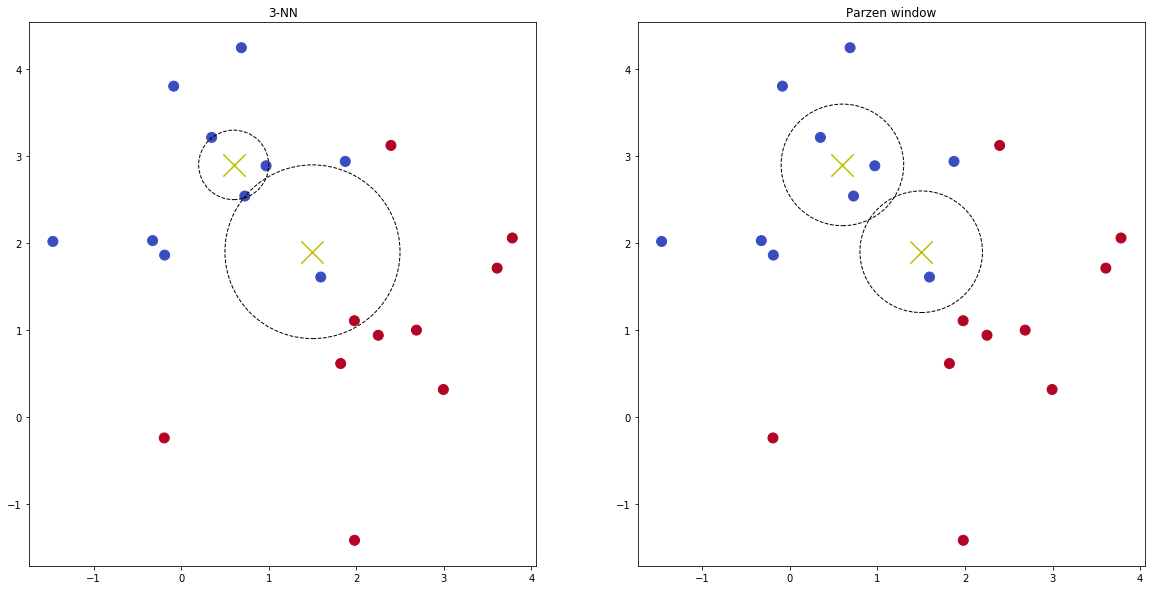

In [22]:
x, y = make_blobs(n_samples=20, n_features=2, centers=2 ,cluster_std=1, random_state=9, center_box=(0,5))
cmap = plt.cm.coolwarm
plt.figure(figsize=(20,10))
# plt.scatter(x[:,0], x[:,1], s= 200, c = y, cmap=cmap)
# plt.scatter(1.5, 1.9, s=500, c='g', marker='x')
plt.subplot(121)
ax = plt.gca()

# ax.set_xlim((-4, 6))
# ax.set_ylim((-4, 6))
ax.scatter(x[:,0], x[:,1], s= 100, c = y, cmap=cmap)
ax.scatter(1.5, 1.9, s=500, marker='x', c='y')
ax.scatter(0.6, 2.9, s=500, marker='x', c='y')
ax.add_artist(plt.Circle((1.5, 1.9), radius=1, fill=False, ls='--'))
ax.add_artist(plt.Circle((0.6, 2.9), radius=0.4, fill=False, ls='--'))
ax.set_title('3-NN')

plt.subplot(122)
ax = plt.gca()

# ax.set_xlim((-4, 6))
# ax.set_ylim((-4, 6))
ax.scatter(x[:,0], x[:,1], s= 100, c = y, cmap=cmap)
ax.scatter(1.5, 1.9, s=500, marker='x', c='y')
ax.scatter(0.6, 2.9, s=500, marker='x', c='y')
ax.add_artist(plt.Circle((1.5, 1.9), radius=0.7, fill=False, ls='--'))
ax.add_artist(plt.Circle((0.6, 2.9), radius=0.7, fill=False, ls='--'))
ax.set_title('Parzen window')

RadiusNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                          metric_params=None, n_jobs=None, outlier_label=None,
                          p=2, radius=2, weights='distance')

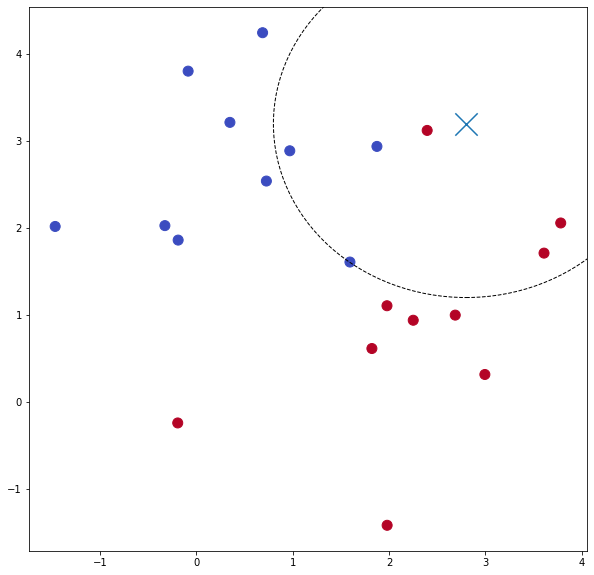

In [23]:
cmap = plt.cm.coolwarm
radius = 2
point = np.array([[2.8, 3.2]])
plt.figure(figsize=(10,10))
ax = plt.gca()
ax.scatter(x[:,0], x[:,1], s= 100, c = y, cmap=cmap)
ax.scatter(point[:,0], point[:,1], s=500, marker='x')
ax.add_artist(plt.Circle((point[:,0], point[:,1]), radius=radius, fill=False, ls='--'))
clf = RadiusNeighborsClassifier(radius=radius, weights='distance')
clf.fit(x, y)

In [24]:
dist, ind = clf.radius_neighbors(point)
print(dist, ind)

[array([1.99634099, 0.96110936, 1.85607433, 1.50617586, 0.41075147,
       1.69425777])] [array([ 0,  1,  2,  8, 11, 18])]


(-0.1, 2)

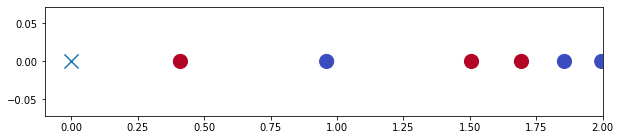

In [25]:
plt.figure(figsize=(10,2))
ax = plt.gca()
ax.scatter(dist[0], np.zeros(dist[0].shape), s = 200, c = y[ind[0]], cmap=cmap)
ax.scatter(0, 0, s = 200, marker='x', cmap=cmap)
# ax.scatter(0, 0, s = 100, cmap=cmap)
ax.set_xlim(-0.1, 2)

In [26]:
clf.predict(np.array([[2.8, 3]]))

array([1])

## Проблемы алгоритма и его ускорение

Очень быстро строится, но очень медленно делает предсказание.

- Сложность построения $O(1)$
- Сложность предсказания $O(nd)$

Варианты:
- Уменьшение d: уменьшение признакового пространства:

- Уменьшение n: сравнение не со всеми объектами тренировочной выборки:
    - взять некоторое количество $m$ объектов, которое во много раз меньше $n$. $-> O(md)$
    - KD деревья: с меньшим количеством данных, для действительные значения. $-> O(d \log n)$, когда $d << n$
    - inverted list для категориальных признаков:
    - fingerprinting.

## Выводы
Плюсы:
- Гладкая граница разделяющая классы.
- Предположение о классе строится только на функции расстояния.
- "Взял данные и классификатор готов" - почти моментальное построение.
- Нечего изменять - только $k$ и расстояние.
- Легко обновлять классификатор простым добавлением данных

Минусы:
- Необходимо вручную вводить недостающие данные.
- Чувствителен к выбросам.
- Чувствителен к большим значениям атрибутов.
- Высокие вычислительные затраты:
    - Необходимо хранить все данные.
    - Время классификации. Необходимо рассчитывать расстояние до всех объектов $O(nd)$
    Соответственно с ростом n классификатор становится медленнее.
    - Вычисление на классификации, а не на построении классификации.

# Вопросы
1. Дана задача, в которой каждый объект описывается двумя числовыми признаками (например, рост и вес). Чему равно евклидово расстояние между объектами (165, 50) и (182, 85)? 
2. Дана задача, в которой каждый объект описывается двумя числовыми признаками (например, рост и вес).Чему равно манхэттенское расстояние между ними?
3. Дана задача, в которой каждый объект описывается двумя категориальными признаками (порода и цвет). Чему равно расстояние между объектами (сиба-ину, рыжий) и (двортерьерб рыжий)?
